In [8]:
import requests
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup as soup
import datetime
from dateutil import parser
import pandas as pd
from collections import Counter

In [3]:
## Find all news that have 'Russlands Krieg gegen die Ukraine' as keyword

sitemap_xml = requests.get("https://www.spiegel.de/sitemaps/news-de.xml").text

root = ET.fromstring(sitemap_xml)

s = soup(sitemap_xml)

urls = s.find('urlset').find_all('url', recursive=False)

parsed_urls = [{'url': url.loc.text, 
  'keywords': url.find('n:keywords').text.replace('\n','').split(','),
     'publication_date': parser.parse(url.find('n:publication_date').text),
  'title': url.find('n:title').text
 } for url in urls ]

def find_urls_by_keywords(parsed_urls, filter=lambda x: True):
    return [x for x in parsed_urls if filter(x['keywords'])]

ukraine_war_urls = find_urls_by_keywords(parsed_urls, lambda x: 'Russlands Krieg gegen die Ukraine' in x)

In [4]:
html_ex = requests.get('https://www.spiegel.de/panorama/justiz/fall-jeffrey-epstein-us-staatsanwalt-kritisiert-prinz-andrew-a-a6662511-900a-4392-afa8-63fedffc1b6b').text

In [7]:
suppe = soup(requests.get('https://www.spiegel.de/sitemap.xml').text)
url_liste = [x.text for x in suppe.find_all('loc')]

In [36]:

url_liste[-100:]

['https://www.spiegel.de/sitemaps/article/sitemap-2022-02_63.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-02_64.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-02_65.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_1.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_2.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_3.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_4.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_5.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_6.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_7.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_8.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_9.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_10.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_11.xml',
 'https://www.spiegel.de/sitemaps/article/sitemap-2022-03_12.xml',
 'ht

In [37]:
linkListAll = [y.text for url in url_liste[-160:] for y in soup(requests.get(url).text).find_all('loc')]
print(linkListAll)
linkList = [x.text for x in linkListSuppe.find_all('loc')]

['https://www.spiegel.de/ausland/usa-ex-justizminister-william-barr-widerspricht-donald-trump-a-df70a074-3424-4e3a-98d7-6332e5d8f73e', 'https://www.spiegel.de/kultur/kino/filmpreise-helen-mirren-erhaelt-sag-award-fuers-lebenswerk-will-smith-erstmals-ausgezeichnet-a-03606963-2fba-4eb6-9ac6-c380917b4543', 'https://www.spiegel.de/start/scheinstudium-an-einer-hochschule-oder-universitaet-mache-ich-mich-strafbar-a-a0e1121d-6866-4b74-b560-389e4c400d8d', 'https://www.spiegel.de/wissenschaft/natur/surfen-in-portugal-der-tag-der-monsterwelle-von-nazare-a-e274a3f3-f289-474d-8ad3-6ea3457d28f5', 'https://www.spiegel.de/politik/deutschland/russland-manuela-schwesig-will-umstrittene-nord-stream-stiftung-aufloesen-a-d1aa8593-4c8f-4396-a1f9-ae3cdd9bdade', 'https://www.spiegel.de/ausland/belarus-alexander-lukaschenko-sichert-seine-macht-a-a452c005-b7e4-48d9-aba5-b4751861d9bf', 'https://www.spiegel.de/panorama/inzell-bus-unglueck-in-bayern-ermittler-suchen-nach-ursache-a-8289faec-6c67-4c59-ab90-70a8d8c2

In [38]:

all_keywords = []

for link in linkListAll:
    sou = soup( requests.get(link).text)
    a = sou.find('meta', {'name':'news_keywords'})['content']
    datum = sou.find('meta',{'name':'date'} )['content']
    all_keywords.append({'keywords':a, 'date': datum})



In [40]:
all_keywords

[{'keywords': 'Ausland, USA, William Barr, Donald Trump',
  'date': '2022-02-28T08:55:02+01:00'},
 {'keywords': 'Kultur, Kino, Helen Mirren, Jessica Chastain',
  'date': '2022-02-28T08:42:09+01:00'},
 {'keywords': 'Start, Universitäten, Hochschulen, Hochschulrektorenkonferenz (HRK), Studienstart, Studienfinanzierung',
  'date': '2022-02-28T08:37:00+01:00'},
 {'keywords': 'Wissenschaft, Natur, Satellitenbild der Woche, Satelliten',
  'date': '2022-02-28T08:34:33+01:00'},
 {'keywords': 'Politik, Deutschland, Ukraine, SPD, Manuela Schwesig, Russland',
  'date': '2022-02-28T08:08:44+01:00'},
 {'keywords': 'Ausland, Belarus, Alexander Lukaschenko',
  'date': '2022-02-28T08:07:07+01:00'},
 {'keywords': 'Panorama, Bayern', 'date': '2022-02-28T08:01:06+01:00'},
 {'keywords': 'Wirtschaft, Schweiz, Wladimir Putin, Bundesrat, Ukraine',
  'date': '2022-02-28T07:59:05+01:00'},
 {'keywords': 'Wirtschaft, Sanktionen gegen Russland, Russland, Ukraine, Donezk, Europa, Wladimir Putin, Sergej Lawrow',
  

In [47]:
import json
from collections import Counter

In [3]:
with open('keywords.txt', 'r') as this:
    data = this.read()

In [5]:
import json
data = json.loads(data)

In [6]:
data

[{'keywords': 'Ausland, USA, William Barr, Donald Trump',
  'date': '2022-02-28T08:55:02+01:00'},
 {'keywords': 'Kultur, Kino, Helen Mirren, Jessica Chastain',
  'date': '2022-02-28T08:42:09+01:00'},
 {'keywords': 'Start, Universitäten, Hochschulen, Hochschulrektorenkonferenz (HRK), Studienstart, Studienfinanzierung',
  'date': '2022-02-28T08:37:00+01:00'},
 {'keywords': 'Wissenschaft, Natur, Satellitenbild der Woche, Satelliten',
  'date': '2022-02-28T08:34:33+01:00'},
 {'keywords': 'Politik, Deutschland, Ukraine, SPD, Manuela Schwesig, Russland',
  'date': '2022-02-28T08:08:44+01:00'},
 {'keywords': 'Ausland, Belarus, Alexander Lukaschenko',
  'date': '2022-02-28T08:07:07+01:00'},
 {'keywords': 'Panorama, Bayern', 'date': '2022-02-28T08:01:06+01:00'},
 {'keywords': 'Wirtschaft, Schweiz, Wladimir Putin, Bundesrat, Ukraine',
  'date': '2022-02-28T07:59:05+01:00'},
 {'keywords': 'Wirtschaft, Sanktionen gegen Russland, Russland, Ukraine, Donezk, Europa, Wladimir Putin, Sergej Lawrow',
  

<AxesSubplot:xlabel='date'>

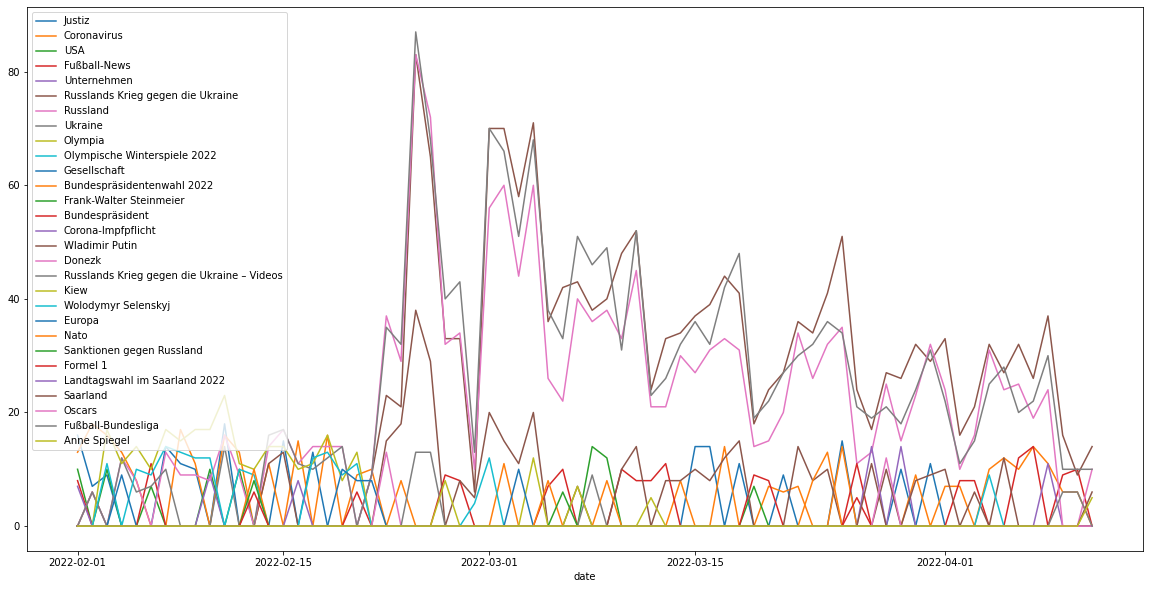

In [17]:
df = pd.DataFrame(data)
df['keywords'] = df['keywords'].map(lambda x: x.split(',')).map(lambda x :list(map(lambda y: y.strip(), x)))
filterlist = ['Ausland', 'Panorama', 'Politik', 'Sport', 'Wirtschaft', 'Wissenschaft', 'Deutschland', 'Kultur','Meinung','Leben']
df['filtered_keywords'] = df['keywords'].map(lambda liste: [x for x in liste if not x in filterlist])
df['date'] = df['date'].map(lambda x: (parser.parse(x).date()))
df_new = df.groupby('date').sum()
df_new['counter'] = df_new['filtered_keywords'].map(Counter)
df_new['most_common'] = df_new['filtered_keywords'].map(lambda x:dict(Counter(x).most_common(5)))
most_common = df_new['most_common'].apply(pd.Series).fillna(0)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
most_common.plot()

In [12]:
df['filtered_keywords']

0                       [USA, William Barr, Donald Trump]
1                  [Kino, Helen Mirren, Jessica Chastain]
2       [Start, Universitäten, Hochschulen, Hochschulr...
3           [Natur, Satellitenbild der Woche, Satelliten]
4              [Ukraine, SPD, Manuela Schwesig, Russland]
                              ...                        
7969            [Globale Gesellschaft, Kambodscha, Asien]
7970    [Südossetien, Russland, Georgien, Abchasien, U...
7971    [Leute, Red Hot Chili Peppers, Hollywood, Los ...
7972    [Unternehmen, BASF, Chemieindustrie, Russlands...
7973    [Russlands Krieg gegen die Ukraine, Russland, ...
Name: filtered_keywords, Length: 7974, dtype: object